In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
#Load and clean column names
df = pd.read_csv("heart_disease_uci.csv") 
df.columns = df.columns.str.strip()
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
#Exploring the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [26]:
#Preprocessing Data
#Dropping unwanted columns
df.drop(columns=[col for col in ['id', 'dataset'] if col in df.columns], inplace=True)
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [30]:
#Handling Data Types
df.dropna(inplace=True)

df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)
df.head(5) #For visualisation purposes

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


In [34]:
#intended categorical columns
intended_categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
categorical_cols = [col for col in intended_categorical_cols if col in df.columns]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head(5)

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145.0,233.0,1,150.0,0,2.3,0.0,0,True,False,False,True,False,False,False,False,False,False
1,67,160.0,286.0,0,108.0,1,1.5,3.0,2,True,False,False,False,False,False,True,False,True,False
2,67,120.0,229.0,0,129.0,1,2.6,2.0,1,True,False,False,False,False,False,True,False,False,True
3,37,130.0,250.0,0,187.0,0,3.5,0.0,0,True,False,True,False,True,False,False,False,True,False
4,41,130.0,204.0,0,172.0,0,1.4,0.0,0,False,True,False,False,False,False,False,True,True,False


In [36]:
# Step 6: Handle missing values
df.dropna(inplace=True)
df.head

<bound method NDFrame.head of      age  trestbps   chol  fbs  thalch  exang  oldpeak   ca  num  sex_Male  \
0     63     145.0  233.0    1   150.0      0      2.3  0.0    0      True   
1     67     160.0  286.0    0   108.0      1      1.5  3.0    2      True   
2     67     120.0  229.0    0   129.0      1      2.6  2.0    1      True   
3     37     130.0  250.0    0   187.0      0      3.5  0.0    0      True   
4     41     130.0  204.0    0   172.0      0      1.4  0.0    0     False   
..   ...       ...    ...  ...     ...    ...      ...  ...  ...       ...   
299   68     144.0  193.0    1   141.0      0      3.4  2.0    2      True   
300   57     130.0  131.0    0   115.0      1      1.2  1.0    3      True   
301   57     130.0  236.0    0   174.0      0      0.0  1.0    1     False   
508   47     150.0  226.0    0    98.0      1      1.5  0.0    1      True   
748   56     120.0  100.0    0   120.0      1      1.5  0.0    1      True   

     cp_atypical angina  cp_non-a

In [37]:
# Step 7: Define features and multiclass target
X = df.drop('num', axis=1)
y = df['num']

In [38]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Step 9: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
#Train models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    print(f"\n🔹 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


🔹 Logistic Regression
Accuracy: 0.6333
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.50      0.46      0.48        13
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.28      0.28      0.28        60
weighted avg       0.63      0.63      0.63        60

Confusion Matrix:
[[32  2  1  0  0]
 [ 2  6  2  3  0]
 [ 1  2  0  1  1]
 [ 0  2  1  0  1]
 [ 1  0  1  1  0]]

🔹 SVM
Accuracy: 0.5833
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.25      0.15      0.19        13
           2       0.33      0.20      0.25         5
           3       0.00      0.00      0.00         4
           4       0.

C:\Users\govin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\govin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\govin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6000
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        35
           1       0.20      0.15      0.17        13
           2       0.17      0.20      0.18         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.23      0.26      0.24        60
weighted avg       0.53      0.60      0.56        60

Confusion Matrix:
[[33  2  0  0  0]
 [ 5  2  3  3  0]
 [ 2  2  1  0  0]
 [ 1  2  1  0  0]
 [ 0  2  1  0  0]]


C:\Users\govin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\govin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\govin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


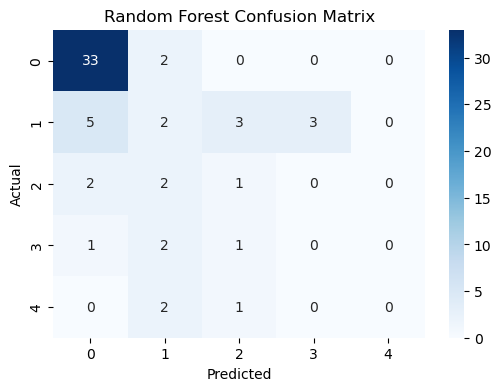

In [41]:
# Step 12: Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, models['Random Forest'].predict(X_test)), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()